# Global sensitivity analysis

10 drugs were processed with a PBPK sensitivity analysis.

In [121]:
import pandas as pd
import numpy as np
from adjustText import adjust_text
import stylia
from stylia.colors.colors import ContinuousColorMap, NamedColors
from matplotlib.patches import Rectangle
from stylia import ONE_COLUMN_WIDTH
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv("data/pbpk/llm_top10_with_pbpk_sensitivity.csv")
endpoints = ["AUC", "Cmax", "CL", "Vd", "tmax"]
columns = ["pbpk_sensitivity {0}".format(v) for v in endpoints]
df = df[df[columns].notna().any(axis=1)]
df["max_outcome"] = np.nanmax(df[columns].values, axis=1)
df["chemical"] = [v.capitalize() for v in df["chemical"].tolist()]
drugs = []
for drug in df["chemical"].tolist():
    if drug == "Rifampin":
        drug = "Rifampicin"
    drugs += [drug]
df["chemical"] = drugs
drugs = sorted(set(df["chemical"]))
print(len(drugs))

dr = pd.read_csv("../results/results_pairs/chemical_gene_pairs_prediction_output_focus_with_variant_aggregates_top50_filter_llm_top10.csv")
drugs_ = []
for d in dr["chemical"].tolist():
    d = d.lower()
    if d == "rifampin":
        d = "rifampicin"
    drugs_ += [d.lower()]
dr["chemical"] = drugs_

10


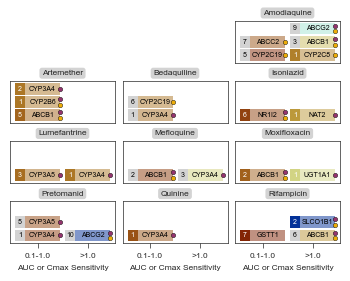

In [154]:
def plot_sensitive_genes(ax, df, drug, i):
    df = df[df["chemical"] == drug]
    dr_ = dr[dr["chemical"] == drug.lower()]
    if dr_.shape[0] == 0:
        print(drug)
        raise Exception
    afr_abundant = set()
    afr_specific = set()
    for v in dr_[["gene", "afr_abundant_variants", "afr_specific_variants"]].values:
        if v[1] >= 50:
            afr_abundant.add(v[0])
        if v[2] >= 1:
            afr_specific.add(v[0])
    genes_hc = []
    genes_lc = []
    for v in df[["gene"] + columns].values:
        if np.any(v[1:] > 1):
            genes_hc.append(v[0])
    for v in df[["gene"] + columns].values:
        if v[0] in genes_hc:
            continue
        if np.any(v[1:] > 0.1):
            genes_lc.append(v[0])
    df = df.sort_values("max_outcome", ascending=True).reset_index(drop=True)
    cmap = ContinuousColorMap()
    cmap.fit([0, 5])
    hc_counts = 0
    lc_counts = 0
    for v in df[["gene", "train_set", "llm_rank"] + columns].values:
        if v[0] not in genes_hc and v[0] not in genes_lc:
            continue
        vmax = np.nanmax(v[3:])
        color = cmap.transform([vmax])[0]
        if v[0] in genes_hc:
            x = 1
            y = hc_counts
            hc_counts += 1
        else:
            x = 0
            y = lc_counts
            lc_counts += 1
        ax.text(x+0.1, y, v[0], color="black", ha="center", va="center")
        rect = Rectangle((x-0.45, y-0.45), 0.9, 0.9, facecolor=color, lw=0, alpha=0.5)
        ax.add_patch(rect)
        if v[1] == 1:
            ax.text(x-0.35, y, v[2], color="white", ha="center", va="center")
            rect = Rectangle((x-0.45, y-0.45), 0.2, 0.9, facecolor=color, lw=0, alpha=1)
            ax.add_patch(rect)
        else:
            ax.text(x-0.35, y, v[2], color="black", ha="center", va="center")
            rect = Rectangle((x-0.45, y-0.45), 0.2, 0.9, facecolor=NamedColors().gray, lw=0, alpha=1)
            ax.add_patch(rect)
        if v[0] in afr_abundant and v[0] in afr_specific:
            ax.scatter([x+0.45], [y-0.22], color=NamedColors().yellow, edgecolor="black", lw=0.3)
            ax.scatter([x+0.45], [y+0.22], color=NamedColors().purple, edgecolor="black", lw=0.3)
        else:
            if v[0] in afr_abundant:
                ax.scatter([x+0.45], [y], color=NamedColors().yellow, edgecolor="black", lw=0.3)
            if v[0] in afr_specific:
                ax.scatter([x+0.45], [y], color=NamedColors().purple, edgecolor="black", lw=0.3)
    ax.set_yticks([])
    if i > 6:
        ax.set_xticks([0, 1])
        ax.set_xticklabels(["0.1-1.0", ">1.0"])
    else:
        ax.set_xticks([])
    ax.set_xlim(-0.55, 1.55)
    ax.set_ylim(-0.6, 2.6)
    ax.grid()
    #stylia.label(ax, title=drug, xlabel="AUC or Cmax Sensitivity", ylabel="")
    #stylia.label(ax, title=drug, xlabel="", ylabel="")
    ax.set_title(label=drug, bbox={'facecolor': 'lightgray', 'edgecolor': 'none', 'boxstyle': 'round,pad=0.3'}, pad=4)
    ax.set_ylabel("")
    ax.set_xlabel("")

fig, axs = stylia.create_figure(4, 3, width=ONE_COLUMN_WIDTH, height=ONE_COLUMN_WIDTH*0.8)
ax = axs.next()
ax.axis("off")
stylia.label(ax, title="", xlabel="", ylabel="")
ax = axs.next()
ax.axis("off")
stylia.label(ax, title="", xlabel="", ylabel="")
for i, drug in enumerate(drugs):
    ax = axs.next()
    plot_sensitive_genes(ax, df, drug, i)
    if i > 6:
        ax.set_xlabel("AUC or Cmax Sensitivity")

#plt.tight_layout()
stylia.save_figure("assets/pbpk_sensitivity_genes.png")
stylia.save_figure("assets/pbpk_sensitivity_genes.pdf")

In [28]:
df

,inchikey,cid,chemical,uniprot_ac,gene,gid,train_set,llm_rank,pbpk_sensitivity AUC,pbpk_sensitivity Cmax,pbpk_sensitivity CL,pbpk_sensitivity Vd,pbpk_sensitivity tmax
0,QUIJNHUBAXPXFS-XLJNKUFUSA-N,nan-10cb7504-1815-48f4-9db9-1df9ce025271,Bedaquiline,P08684,CYP3A4,PA130,0,1,0.8700,0.4900,NaN,NaN,NaN
1,QUIJNHUBAXPXFS-XLJNKUFUSA-N,nan-10cb7504-1815-48f4-9db9-1df9ce025271,Bedaquiline,P08183,ABCB1,PA267,0,2,0.0000,0.0000,NaN,NaN,NaN
2,QUIJNHUBAXPXFS-XLJNKUFUSA-N,nan-10cb7504-1815-48f4-9db9-1df9ce025271,Bedaquiline,P20815,CYP3A5,PA131,0,3,0.0000,0.0000,NaN,NaN,NaN
3,QUIJNHUBAXPXFS-XLJNKUFUSA-N,nan-10cb7504-1815-48f4-9db9-1df9ce025271,Bedaquiline,P10635,CYP2D6,PA128,0,4,0.0000,0.0000,NaN,NaN,NaN
4,QUIJNHUBAXPXFS-XLJNKUFUSA-N,nan-10cb7504-1815-48f4-9db9-1df9ce025271,Bedaquiline,P33527,ABCC1,PA244,0,5,0.0000,0.0000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,HMBKEXWSKGGBBT-NLQPYBGPSA-N,PA451250,Rifampin,P08183,ABCB1,PA267,0,6,1.3400,0.1100,0.1600,0.5500,0.0
296,HMBKEXWSKGGBBT-NLQPYBGPSA-N,PA451250,Rifampin,P30711,GSTT1,PA183,1,7,0.1100,0.0004,0.0000,0.0900,0.0
297,HMBKEXWSKGGBBT-NLQPYBGPSA-N,PA451250,Rifampin,P11473,VDR,PA37301,1,8,0.0000,0.0000,0.0000,0.0000,0.0
298,HMBKEXWSKGGBBT-NLQPYBGPSA-N,PA451250,Rifampin,P20813,CYP2B6,PA123,1,9,0.0280,0.0160,0.0290,0.0360,0.0


In [106]:
df = pd.read_csv('../results/results_pairs/llm_top10_only_minimal_info.csv')

# Mock data
np.random.seed(1)
alpha = 2
beta = 8
pbpk_sensitivity = np.random.beta(alpha, beta, size=df.shape[0])
df['pbpk_sensitivity'] = pbpk_sensitivity

chemicals = list(df["chemical"].unique())
cap2name = dict((c.capitalize(), c) for c in chemicals)
chemicals = sorted([c.capitalize() for c in chemicals])

drug_renames = {
    "P-aminosalicylic acid": "Aminosalicylic acid",
    "Linezolide": "Linezolid"
}

def rename_old_to_new(drug):
    drug_o_n = dict((k, v) for k, v in drug_renames.items())
    if drug in drug_o_n:
        return drug_o_n[drug]
    return drug

def rename_new_to_old(drug):
    drug_n_o = dict((v, k) for k, v in drug_renames.items())
    if drug in drug_n_o:
        return drug_n_o[drug]
    return drug

new_chemicals = [rename_old_to_new(c.capitalize()) for c in df["chemical"].tolist()]
df["chemical"] = new_chemicals
df = df.sort_values(by=["chemical", "llm_rank"]).reset_index(drop=True)

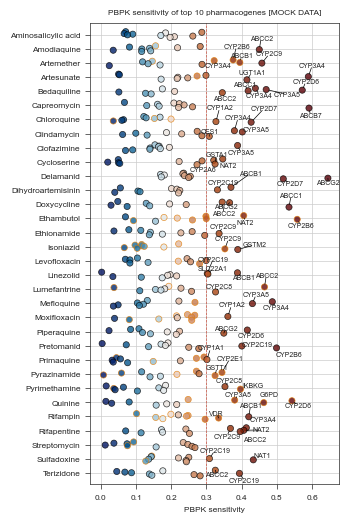

In [108]:
fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=ONE_COLUMN_WIDTH*1.5)

sensitivity_threshold = 0.3

named_colors = NamedColors()
cmap = ContinuousColorMap("coolwarm")
cmap.fit(df["pbpk_sensitivity"].tolist())
colors = cmap.transform(df["pbpk_sensitivity"].tolist())
edgecolors = []
for ts in df["train_set"].tolist():
    if ts == 0:
        edgecolors.append("none")
    else:
        edgecolors.append(named_colors.orange)

ax = axs.next()
names = sorted(set(df["chemical"].tolist()))
name2idx = dict((name, idx) for idx, name in enumerate(names))
y = [i for i in range(len(names))]

ax.set_yticks(y)
ax.set_yticklabels(names)
ax.set_ylim(len(names)-0.2, -0.8)

deltas = np.array(list(np.linspace(-0.2, 0.2, 10))*len(names))

x = np.array(df["pbpk_sensitivity"].tolist())
y = np.array([name2idx[drug] for drug in df["chemical"].tolist()]) + deltas
ax.scatter(x, y, c=colors, s=20, alpha=0.8, lw=0.5, edgecolors=edgecolors)
texts = []
genes = df["gene"].tolist()
for i, x_ in enumerate(x):
    if x_ > sensitivity_threshold:
        texts.append(ax.text(x_, y[i], genes[i], ha='center', va='center'))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5), expand_points = (10, 10), expand_text = (10, 10), ax=ax)
ax.axvline(x=sensitivity_threshold, color=named_colors.red, linestyle='--', lw=0.5)

stylia.label(ax, title="PBPK sensitivity of top 10 pharmacogenes [MOCK DATA]", xlabel="PBPK sensitivity", ylabel="")
stylia.save_figure("assets/pbpk_sensitivity_top10_pharmacogenes.png")
stylia.save_figure("assets/pbpk_sensitivity_top10_pharmacogenes.pdf")
